In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/E-com_Data (1).csv')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [5]:
df.duplicated().sum()

3145

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(537971, 12)

In [9]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [10]:
df = df[['CustomerID','InvoieNo','Date of purchase','Price']]
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [11]:
df.isnull().sum()/len(df)*100

,0
CustomerID,24.869370
InvoieNo,0.000186
Date of purchase,0.000186
Price,0.000186


In [12]:
df = df.dropna(subset=['CustomerID'])

In [13]:
df.isnull().sum()/len(df)*100

,0
CustomerID,0.0
InvoieNo,0.0
Date of purchase,0.0
Price,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404181 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        404181 non-null  float64
 1   InvoieNo          404181 non-null  float64
 2   Date of purchase  404181 non-null  object 
 3   Price             404181 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [15]:
df = df.rename(columns={'InvoieNo':'InvoiceNo', 'Date of purchase':'Date'})

In [16]:
df.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [19]:
df['CustomerID'].nunique()

4349

In [20]:
df['Date'].describe()

,Date
count,404181
mean,2017-07-15 15:28:28.388073472
min,2016-12-02 00:00:00
25%,2017-04-12 00:00:00
50%,2017-08-05 00:00:00
75%,2017-10-26 00:00:00
max,2017-12-19 00:00:00


In [21]:
import datetime as dt

Latest_date = dt.datetime(2017,12,20)
Latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [22]:
RFMScore = df.groupby('CustomerID').agg({'Date': lambda x: (Latest_date - x.max()).days,
                                            'InvoiceNo': lambda x: x.count(),
                                             'Price' : lambda x:x.sum()})

In [23]:
RFMScore.rename(columns={'Date':'Recency', 'InvoiceNo':'Frequency', 'Price':'Monetory'}, inplace=True)

In [24]:
RFMScore.reset_index(inplace=True)

In [25]:
RFMScore

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,754,280608.0


In [26]:
RFMScore['Recency'].describe()

,Recency
count,4349.000000
mean,93.299379
std,100.701315
min,1.000000
25%,18.000000
50%,51.000000
75%,144.000000
max,381.000000


In [27]:
RFMScore['Frequency'].describe()

,Frequency
count,4349.000000
mean,92.936537
std,232.086935
min,1.000000
25%,17.000000
50%,42.000000
75%,101.000000
max,7970.000000


In [28]:
RFMScore['Monetory'].describe()

,Monetory
count,4.349000e+03
mean,2.299380e+05
std,8.572589e+05
min,-5.037200e+04
25%,3.814800e+04
50%,8.365500e+04
75%,2.056120e+05
max,3.553619e+07


In [29]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [30]:
RFMScore['Monetory'].describe()

,Monetory
count,4349.00
mean,229938.00
std,857258.89
min,-50372.00
25%,38148.00
50%,83655.00
75%,205612.00
max,35536194.00


In [31]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetory
0,2.00,4,182,553704.00
1,3.00,77,27,257404.00
2,4.00,19,72,176613.00
3,5.00,311,16,41976.00
4,6.00,37,84,151822.00


In [32]:
df = RFMScore[['Recency', 'Frequency', 'Monetory']]
df.head()

,Recency,Frequency,Monetory
0,4,182,553704.00
1,77,27,257404.00
2,19,72,176613.00
3,311,16,41976.00
4,37,84,151822.00


In [33]:
df.isnull().sum()

,0
Recency,0
Frequency,0
Monetory,0


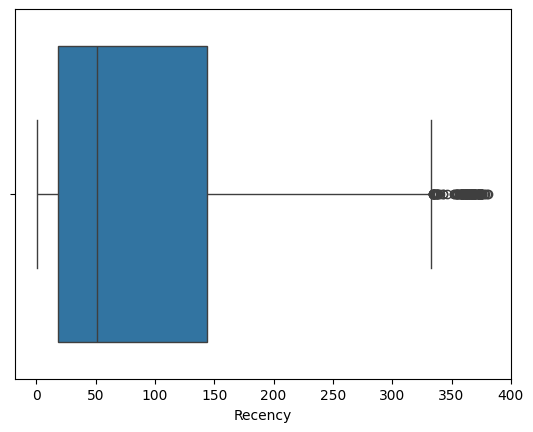

In [34]:
sns.boxplot(x = 'Recency', data = df)
plt.show()

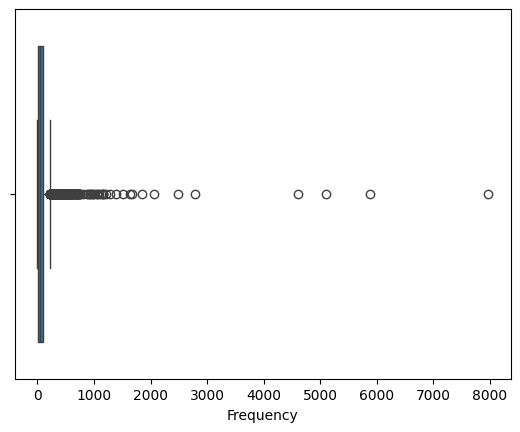

In [35]:
sns.boxplot(x = 'Frequency', data = df)
plt.show()

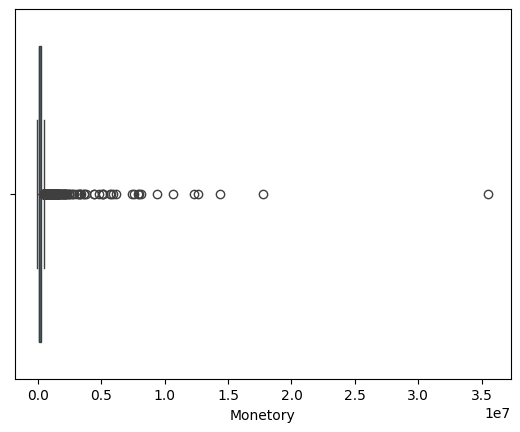

In [36]:
sns.boxplot(x = 'Monetory', data = df)
plt.show()

In [37]:
df['log_recency'] = np.log1p(df['Recency'])
df['log_frequency'] = np.log1p(df['Frequency'])
#df['log_monetory'] = np.log1p(df['Monetory'])

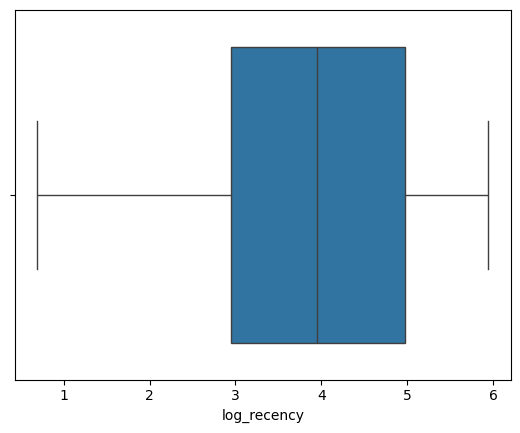

In [38]:
sns.boxplot(x = 'log_recency', data = df)
plt.show()

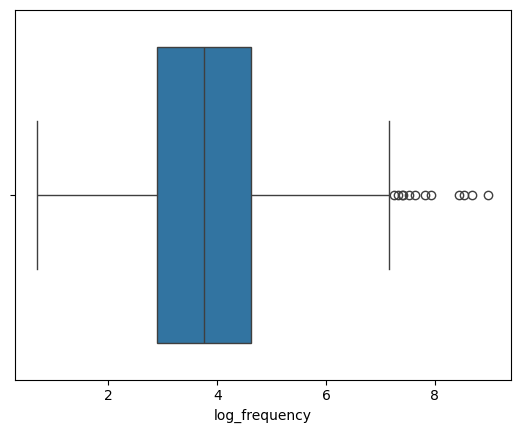

In [39]:
sns.boxplot(x = 'log_frequency', data = df)
plt.show()

In [40]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=False)
df['power_Monetory'] = pt.fit_transform(df[['Monetory']])


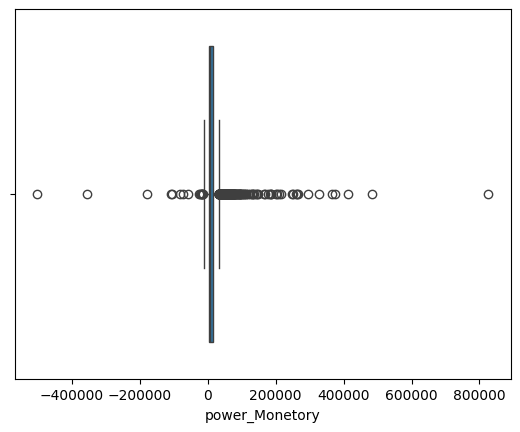

In [41]:
sns.boxplot(x = 'power_Monetory', data = df)
plt.show()

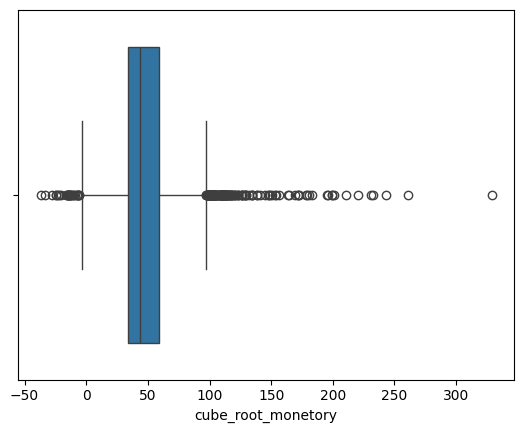

In [42]:
df['cube_root_monetory'] = np.cbrt(df['Monetory'])

sns.boxplot(x = 'cube_root_monetory', data = df)
plt.show()

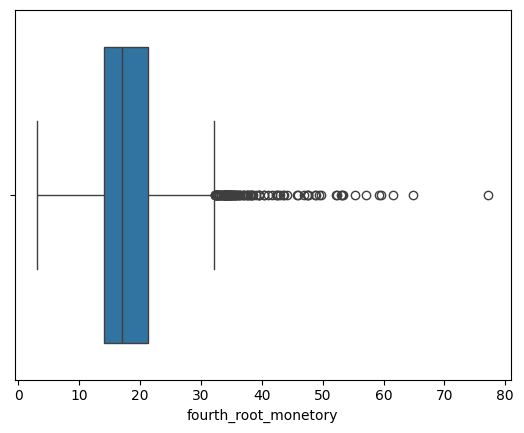

In [43]:
df['fourth_root_monetory'] = np.power(df['Monetory'], 1/4)

sns.boxplot(x = 'fourth_root_monetory', data = df)
plt.show()

In [44]:
df['reciprocal_monetory'] = 1/df['Monetory']

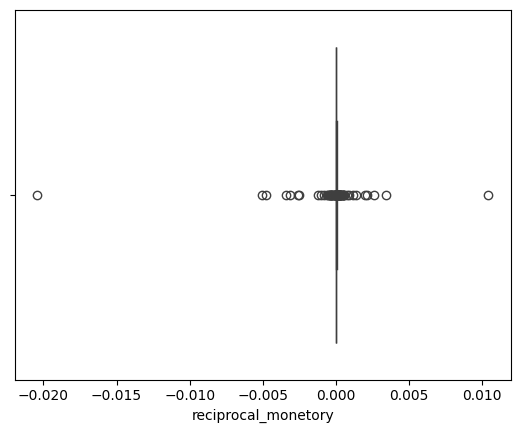

In [45]:
sns.boxplot(x = 'reciprocal_monetory', data = df)
plt.show()

In [46]:
df.head()

,Recency,Frequency,Monetory,log_recency,log_frequency,power_Monetory,cube_root_monetory,fourth_root_monetory,reciprocal_monetory
0,4,182,553704.00,1.61,5.21,33732.57,82.12,27.28,0.00
1,77,27,257404.00,4.36,3.33,18723.44,63.61,22.52,0.00
2,19,72,176613.00,3.00,4.29,14017.00,56.11,20.50,0.00
3,311,16,41976.00,5.74,2.83,4645.36,34.75,14.31,0.00
4,37,84,151822.00,3.64,4.44,12478.70,53.35,19.74,0.00


In [47]:
df = df[['log_recency', 'log_frequency', 'fourth_root_monetory']]

In [48]:
df.rename(columns={'log_recency':'Recency', 'log_frequency':'Frequency', 'fourth_root_monetory':'Monetory'}, inplace=True)

In [49]:
df.head()

,Recency,Frequency,Monetory
0,1.61,5.21,27.28
1,4.36,3.33,22.52
2,3.00,4.29,20.50
3,5.74,2.83,14.31
4,3.64,4.44,19.74


In [50]:
df.isnull().sum()

,0
Recency,0
Frequency,0
Monetory,30


In [51]:
df.dropna(inplace=True)

In [52]:
df.isnull().sum()

,0
Recency,0
Frequency,0
Monetory,0


In [53]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Recency,Frequency,Monetory
0,-1.16,0.86,1.40
1,0.20,-0.25,0.75
2,-0.48,0.31,0.47
3,0.89,-0.55,-0.38
4,-0.16,0.40,0.36


In [54]:
df_scaled.isnull().sum()

,0
Recency,0
Frequency,0
Monetory,0


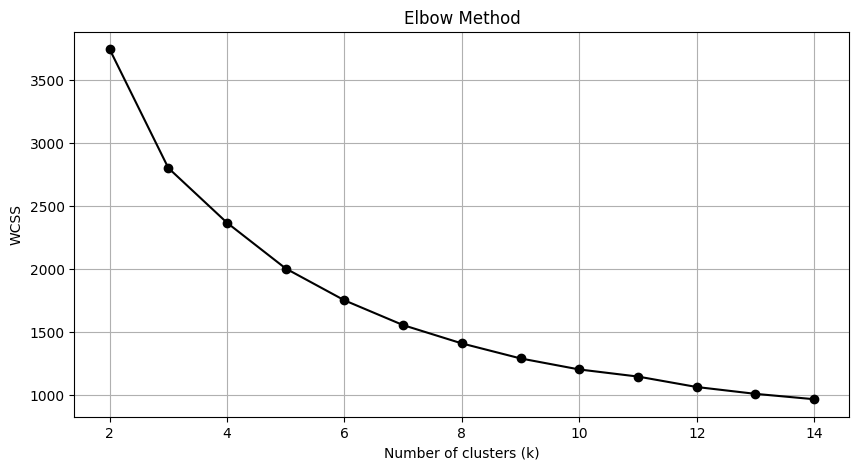

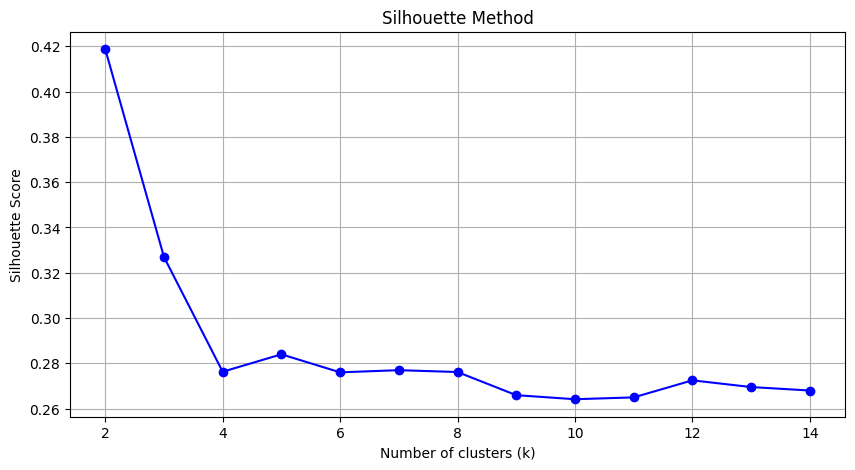

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silhouettes = []

for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, random_state=42, init="k-means++")
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)
  silhouettes.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), wcss, 'ko-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), silhouettes, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.grid(True)
plt.show()


In [56]:
silhouettes

[0.41872458436997484,
 0.32694292027473093,
 0.27625212521427883,
 0.2839427589995171,
 0.27598261289735887,
 0.2769357037099581,
 0.2761236163821143,
 0.2658917807700931,
 0.26410534591983964,
 0.2649136220707556,
 0.27244748557403514,
 0.26948258477475207,
 0.2679517245492946]

In [57]:
wcss

[3740.8820076803718,
 2798.471106320163,
 2364.124261458284,
 2001.0946846844258,
 1748.7558782735314,
 1552.1179845648887,
 1406.9200842100665,
 1287.8546073166542,
 1200.3952626899813,
 1144.0304030329478,
 1061.1848599456823,
 1006.9156748097095,
 964.3622259202946]

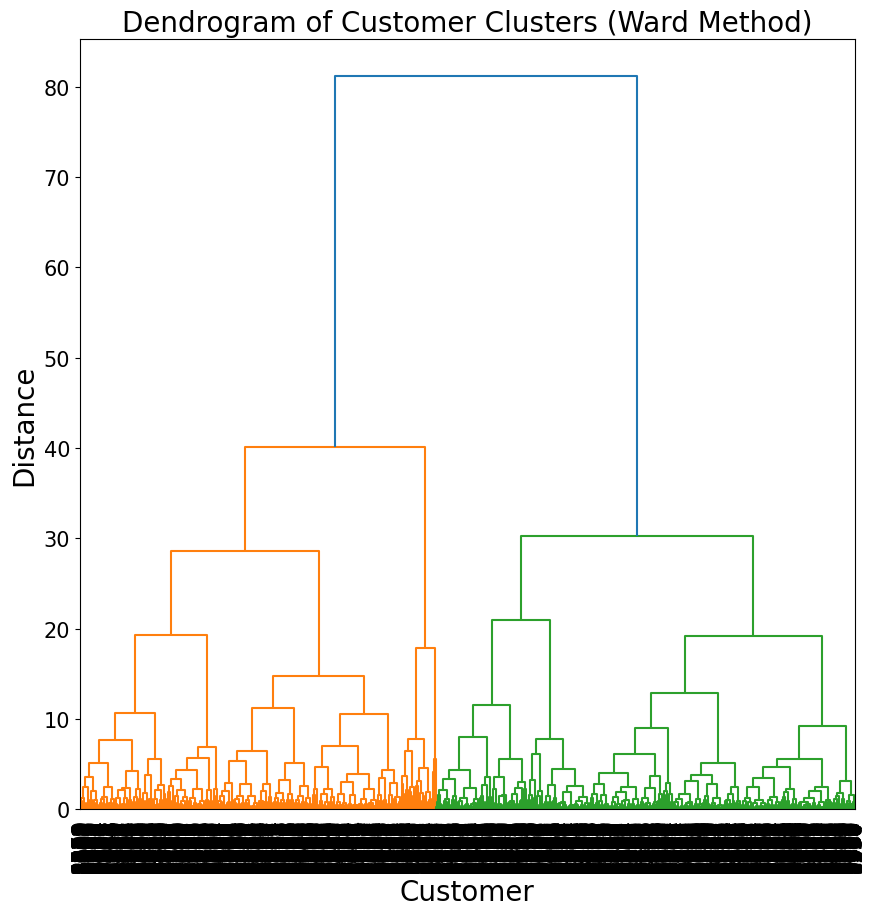

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage


data_subset = df_scaled


linkage_matrix = linkage(data_subset, method='ward')


plt.figure(figsize=(10, 10))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending')
plt.title('Dendrogram of Customer Clusters (Ward Method)', size=20)
plt.xlabel('Customer', size=20)
plt.ylabel('Distance', size=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.show()

In [59]:
kmeans = KMeans(n_clusters=3, random_state=42, init="k-means++")
kmeans.fit(df_scaled)
df['Kmeans_Cluster'] = kmeans.labels_
df.head()

,Recency,Frequency,Monetory,Kmeans_Cluster
0,1.61,5.21,27.28,1
1,4.36,3.33,22.52,2
2,3.00,4.29,20.50,2
3,5.74,2.83,14.31,0
4,3.64,4.44,19.74,2


In [60]:
df['Kmeans_Cluster'].value_counts()

,count
Kmeans_Cluster,
2,1865
0,1666
1,788


<Axes: xlabel='Kmeans_Cluster'>

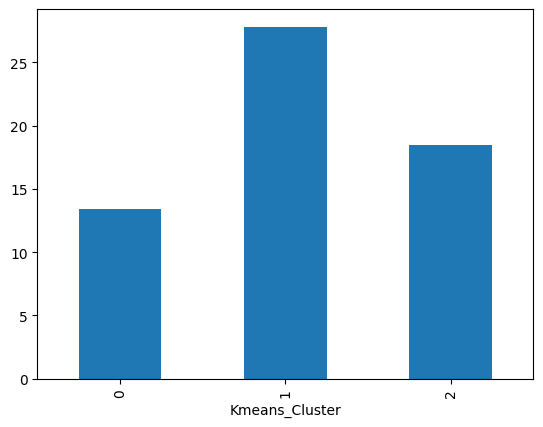

In [61]:
df.groupby('Kmeans_Cluster')['Monetory'].mean().plot(kind='bar')

In [62]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.groupby('Kmeans_Cluster')['Monetory'].mean()

,Monetory
Kmeans_Cluster,
0,13.45
1,27.82
2,18.48


<Axes: xlabel='Kmeans_Cluster'>

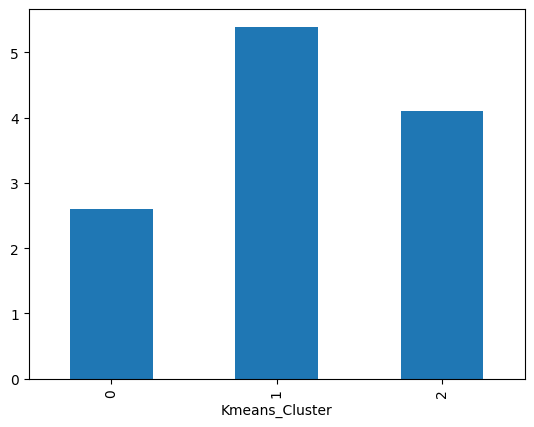

In [63]:

df.groupby('Kmeans_Cluster')['Frequency'].mean().plot(kind='bar')

In [64]:
df.groupby('Kmeans_Cluster')['Frequency'].mean()

,Frequency
Kmeans_Cluster,
0,2.61
1,5.39
2,4.10


<Axes: xlabel='Kmeans_Cluster'>

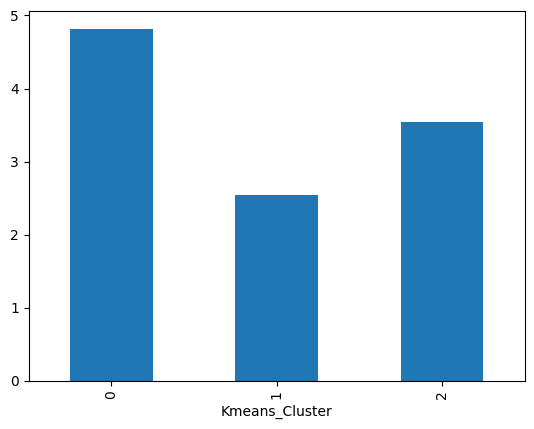

In [65]:
df.groupby('Kmeans_Cluster')['Recency'].mean().plot(kind='bar')

In [66]:
df.groupby('Kmeans_Cluster')['Recency'].mean()

,Recency
Kmeans_Cluster,
0,4.82
1,2.54
2,3.54


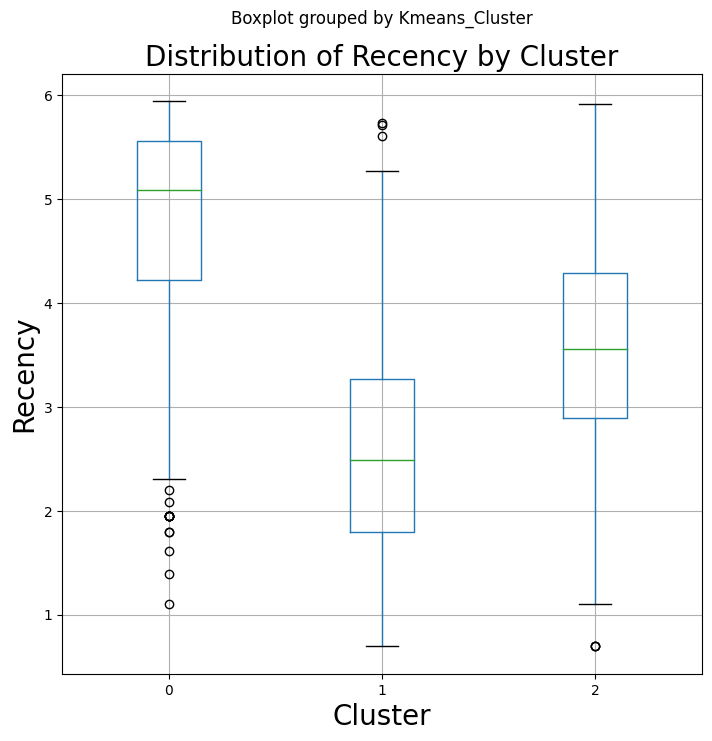

In [67]:
df.boxplot('Recency', by='Kmeans_Cluster', figsize=(8, 8))
plt.title('Distribution of Recency by Cluster', size=20)
plt.xlabel('Cluster', size=20)
plt.ylabel('Recency', size=20)
plt.show()

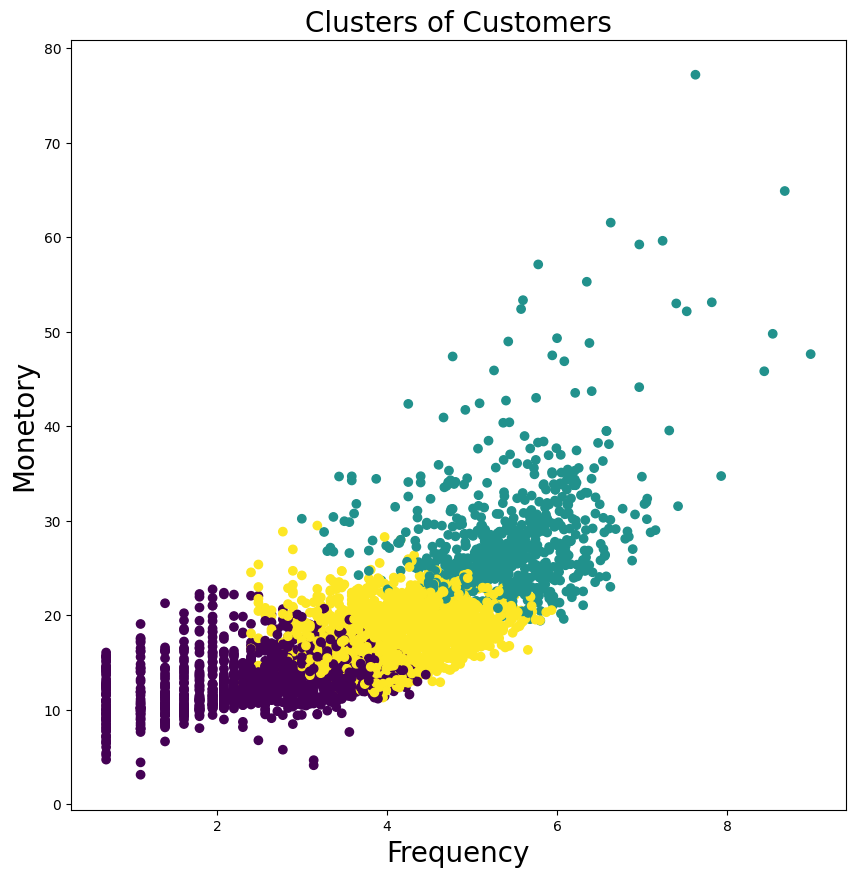

In [68]:
plt.figure(figsize=(10, 10))
plt.scatter(df['Frequency'], df['Monetory'], c=df['Kmeans_Cluster'], cmap='viridis')
plt.xlabel('Frequency', size=20)
plt.ylabel('Monetory', size=20)
plt.title('Clusters of Customers', size=20)
plt.show()

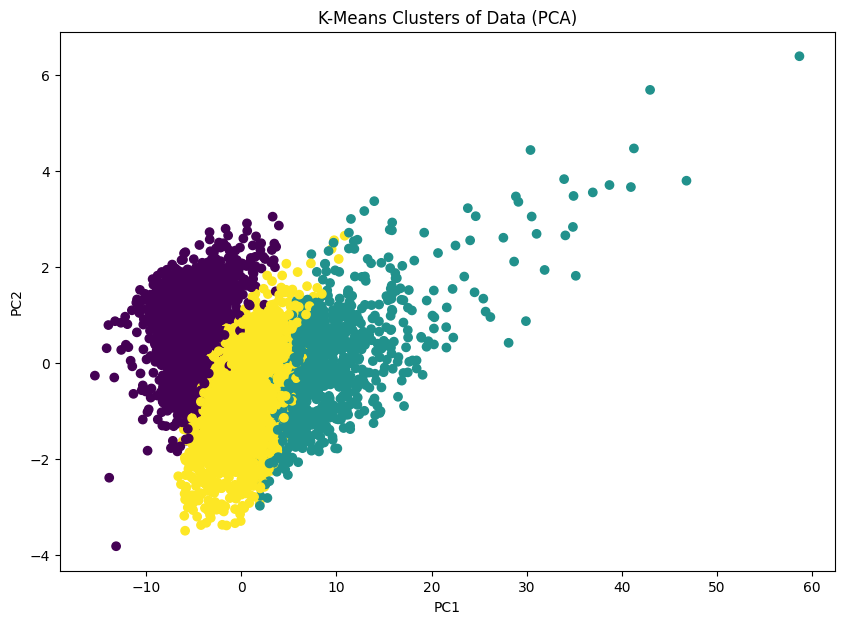

In [69]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Kmeans_Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clusters of Data (PCA)')
plt.show()

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

linkage_methods = ['single', 'complete', 'average', 'ward']


silhouette_scores = []


for method in linkage_methods:
  for i in range(2, 7):

    model = AgglomerativeClustering(n_clusters=i, linkage=method)

    model.fit(df_scaled)

    silhouette_score_value = silhouette_score(df_scaled, model.labels_)

    silhouette_scores.append(silhouette_score_value)

    print(f"Silhouette score for {method}, {i}: {silhouette_score_value}")

best_method = linkage_methods[np.argmax(silhouette_scores)]

Silhouette score for single, 2: 0.806534728444059
Silhouette score for single, 3: 0.7681022810123456
Silhouette score for single, 4: 0.36392464408162584
Silhouette score for single, 5: 0.2506024389805531
Silhouette score for single, 6: 0.24237896046602705
Silhouette score for complete, 2: 0.5644837027565102
Silhouette score for complete, 3: 0.5506195490875475
Silhouette score for complete, 4: 0.3729336766979413
Silhouette score for complete, 5: 0.36199960921086094
Silhouette score for complete, 6: 0.2417046458573189
Silhouette score for average, 2: 0.6496634567900879
Silhouette score for average, 3: 0.6326195254903086
Silhouette score for average, 4: 0.3103380191901723
Silhouette score for average, 5: 0.28805359661831237
Silhouette score for average, 6: 0.3439418274901381
Silhouette score for ward, 2: 0.3864470194426245
Silhouette score for ward, 3: 0.3557917255819499
Silhouette score for ward, 4: 0.252165626505515
Silhouette score for ward, 5: 0.23258388838912744
Silhouette score for 

In [71]:
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo.fit(df_scaled)
df['agglo_Cluster'] = agglo.labels_
df.head()

,Recency,Frequency,Monetory,Kmeans_Cluster,agglo_Cluster
0,1.61,5.21,27.28,1,1
1,4.36,3.33,22.52,2,0
2,3.00,4.29,20.50,2,1
3,5.74,2.83,14.31,0,0
4,3.64,4.44,19.74,2,1


In [72]:
df['agglo_Cluster'].value_counts()

,count
agglo_Cluster,
0,2335
1,1789
2,195


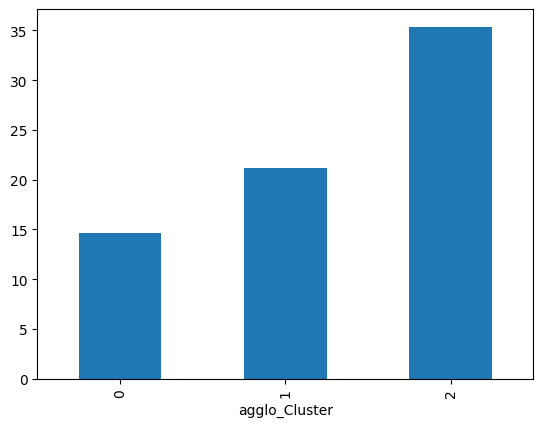

In [73]:
df.groupby('agglo_Cluster')['Monetory'].mean().plot(kind='bar')
plt.show()

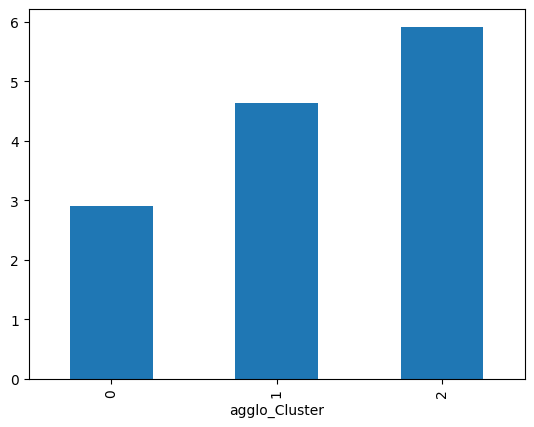

In [74]:
df.groupby('agglo_Cluster')['Frequency'].mean().plot(kind='bar')
plt.show()

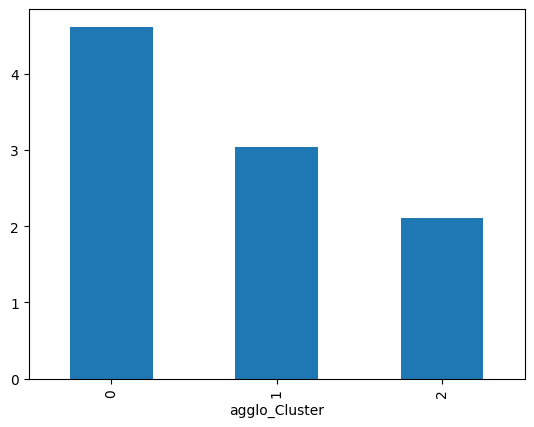

In [75]:
df.groupby('agglo_Cluster')['Recency'].mean().plot(kind='bar')
plt.show()

In [76]:
df.head()

,Recency,Frequency,Monetory,Kmeans_Cluster,agglo_Cluster
0,1.61,5.21,27.28,1,1
1,4.36,3.33,22.52,2,0
2,3.00,4.29,20.50,2,1
3,5.74,2.83,14.31,0,0
4,3.64,4.44,19.74,2,1


In [77]:
df2 = df.drop(columns='Kmeans_Cluster')

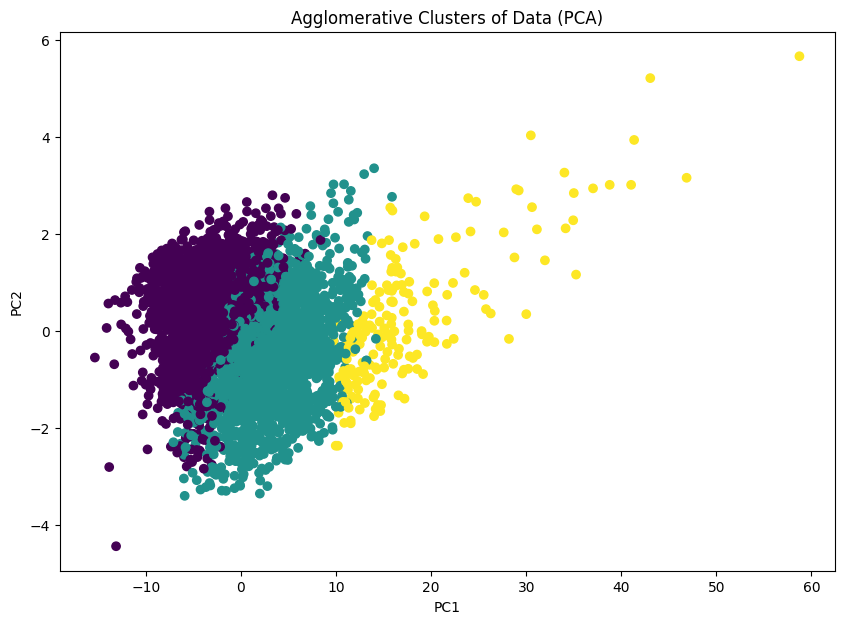

In [78]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_data = pca.fit_transform(df2)

plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df2['agglo_Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clusters of Data (PCA)')
plt.show()